In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day25-normalization/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic Acid']

In [8]:
df.head()

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

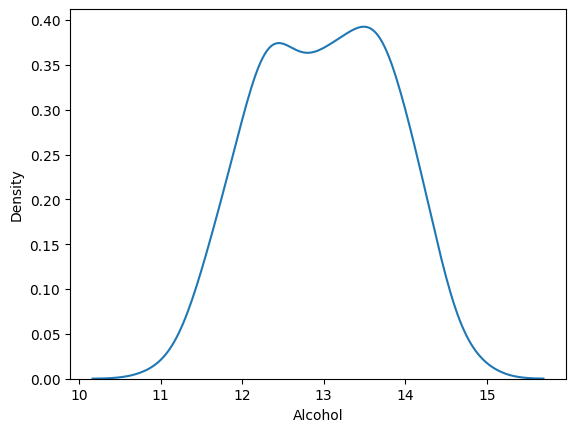

In [11]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

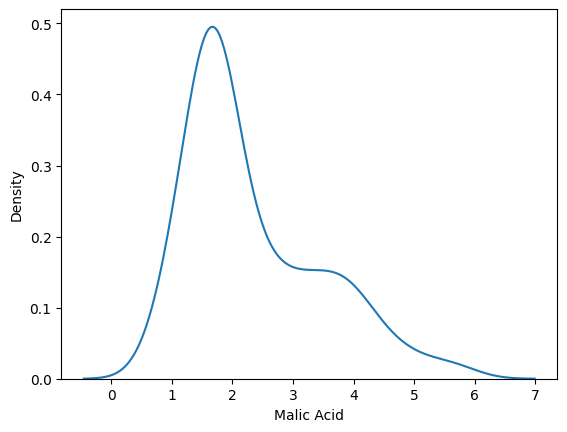

In [12]:
sns.kdeplot(df['Malic Acid'])

In [22]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic Acid'],hue=df['Class Label'],palette=color_dict)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class Label',axis=1),df['Class Label'],test_size=0.3,random_state=0)
X_test.shape,X_train.shape

((54, 2), (124, 2))

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [27]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [28]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

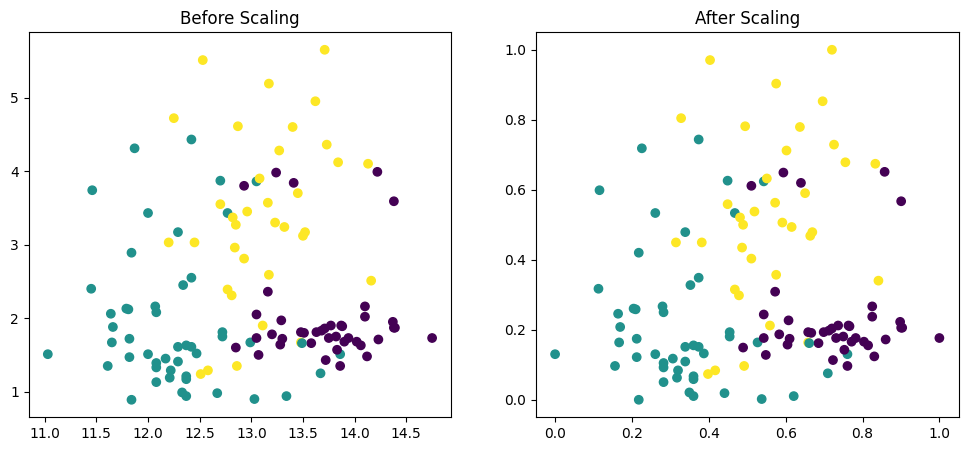

In [29]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

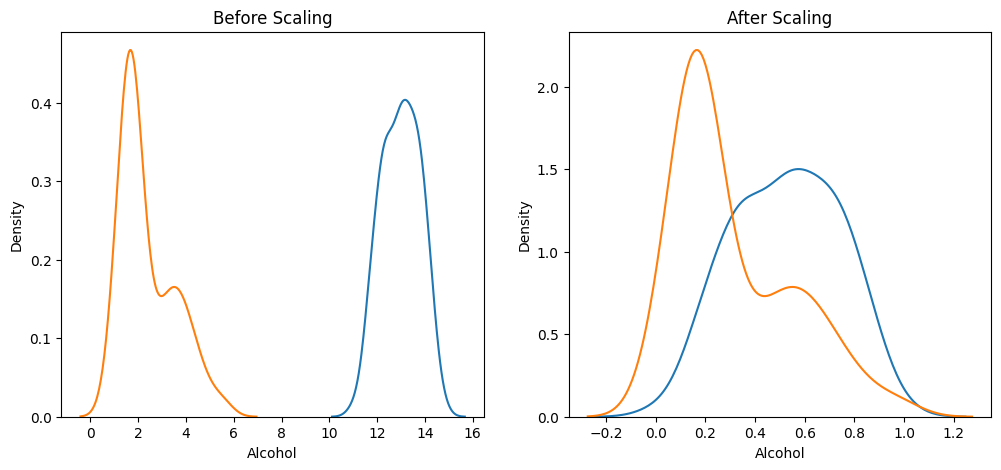

In [30]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

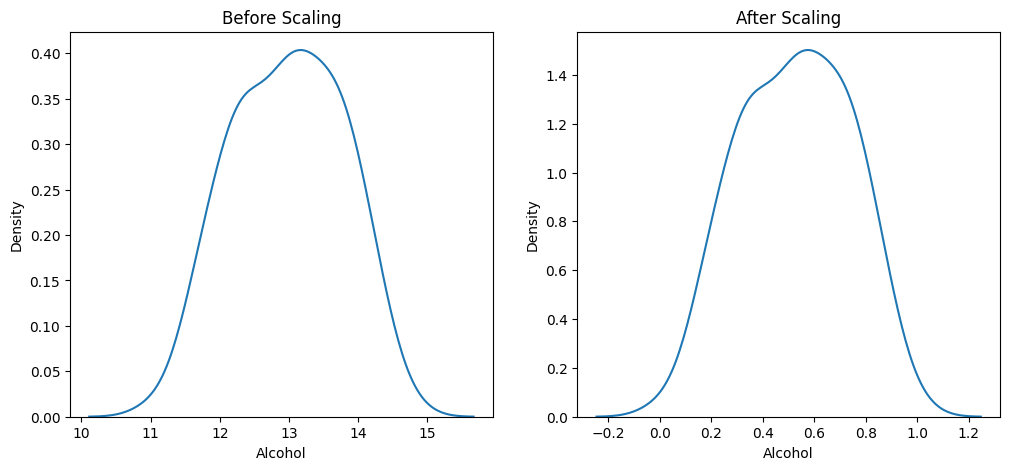

In [32]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)